In [13]:
import xarray as xr
#ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr')
#ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2022-6h-512x256_equiangular_conservative.zarr')
ds=xr.open_zarr('gs://weatherbench2/datasets/era5/1959-2023_01_10-full_37-1h-512x256_equiangular_conservative.zarr')


In [2]:
#print(ds.keys())
print(ds['latitude'])
lat=ds['latitude'][:].data
lon=ds['longitude'][:].data
region_bounds = {
    "lat_min": 25.0,
    "lat_max": 37.0,
    "lon_min": -106.0,
    "lon_max": -89.0
}


<xarray.DataArray 'latitude' (latitude: 256)> Size: 2kB
array([-89.648437, -88.945312, -88.242187, ...,  88.242187,  88.945312,
        89.648437])
Coordinates:
  * latitude  (latitude) float64 2kB -89.65 -88.95 -88.24 ... 88.24 88.95 89.65


In [19]:
import numpy as np

ind_lon_min,ind_lon_max=366,414 #366 414
ind_lat_min,ind_lat_max=160,208
tpw=ds['total_column_water_vapour'][0,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
tp=ds['total_precipitation'][0,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max]
print(tpw.shape)
#[0,ind_lat_min:ind_lat_max,ind_lon_min:ind_lon_max]
print(ind_lat_min,ind_lat_max,ind_lon_min,ind_lon_max)
#print(180/256)
#print(ds['u_component_of_wind'])
#print(ds['total_precipitation'])
#print(ds['total_column_water_vapour'])
print(ds['time'].shape)
import datetime
first_day=datetime.datetime(year,4,1)
dt=first_day-datetime.datetime(1959,1,1)
nstart=dt.days*24
print(ds['time'][nstart])
a=np.arange(0,10,3)
print(a)

(48, 48)
160 208 366 414
(561264,)
<xarray.DataArray 'time' ()> Size: 8B
array('2021-04-01T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 8B 2021-04-01
[0 3 6 9]


In [ ]:
time=ds['time'][:].data
print(time[0])
import datetime
tpwL=[]
levels=[5,7,9,10,12]
for year in range(2002,2022):
    first_day=datetime.datetime(year,4,1)
    dt=first_day-datetime.datetime(1959,1,1)
    nstart=dt.days*24
    nend=nstart+90*24
    tpw_year=ds['total_column_water_vapour'][nstart:nend:3,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    tp_year=ds['total_precipitation'][nstart:nend:3,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    u_wind_year=ds['u_component_of_wind'][nstart:nend:3,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    v_wind_year=ds['v_component_of_wind'][nstart:nend:3,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    geopotential_year=ds['geopotential'][nstart:nend:3,levels,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    temp_2m_year=ds['2m_temperature'][nstart:nend:3,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    mean_sea_level_pressure_year=ds['mean_sea_level_pressure'][nstart:nend:3,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    tpw_xr=xr.DataArray(tpw_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend:3],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    tp_xr=xr.DataArray(tp_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend:3],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    u_wind_xr=xr.DataArray(u_wind_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend:3],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    v_wind_xr=xr.DataArray(v_wind_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend:3],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    geopotential_xr=xr.DataArray(geopotential_year,dims=['time','level','lon','lat'],coords={'time':time[nstart:nend:3],'level':levels,'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    mean_sea_level_pressure_xr=xr.DataArray(mean_sea_level_pressure_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend:3],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    temp_2m_year_xr=xr.DataArray(temp_2m_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend:3],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    surface_pressure_year=ds['surface_pressure'][nstart:nend:3,ind_lon_min:ind_lon_max,ind_lat_min:ind_lat_max].data
    surface_pressure_year_xr=xr.DataArray(surface_pressure_year,dims=['time','lon','lat'],coords={'time':time[nstart:nend:3],'lon':lon[ind_lon_min:ind_lon_max],'lat':lat[ind_lat_min:ind_lat_max]})
    ds_out=xr.Dataset({'total_column_water_vapour':tpw_xr,'total_precipitation':tp_xr,'u_component_of_wind':u_wind_xr,'v_component_of_wind':v_wind_xr,'geopotential':geopotential_xr,'mean_sea_level_pressure':mean_sea_level_pressure_xr,'temperature_2m':temp_2m_year_xr,'surface_pressure':surface_pressure_year_xr})
    comp = dict(zlib=True, complevel=5)
    encoding = {var: comp for var in ds_out.data_vars}
    print(first_day,year)
    ds_out.to_netcdf('weatherbench2_conus_hourly_subset_%4.4i.nc'%year,encoding=encoding)
    #break
#print(time[nstart])

1959-01-01T00:00:00.000000000
2002-04-01 00:00:00 2002
2003-04-01 00:00:00 2003
2004-04-01 00:00:00 2004
2005-04-01 00:00:00 2005
2006-04-01 00:00:00 2006
2007-04-01 00:00:00 2007
2008-04-01 00:00:00 2008
2009-04-01 00:00:00 2009
2010-04-01 00:00:00 2010


In [29]:
!pwd

/Users/mgrecu/Prithvi-WxC/examples


In [20]:
print(ds['level'].data[[5,7,9,10,12]])
print(ds['land_sea_mask'].shape)
print(ds['geopotential_at_surface'].shape)

[ 300  500  700  850 1000]
(512, 256)
(512, 256)


(48,)
(48,)
(48, 48)


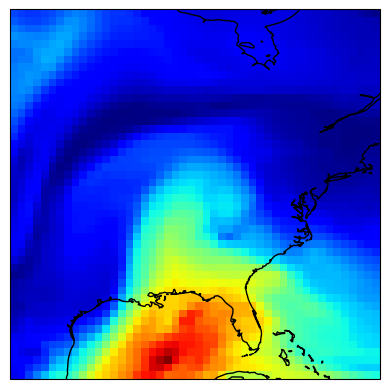

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
print(lon[ind_lon_min:ind_lon_max].shape)
print(lat[ind_lat_min:ind_lat_max].shape)
print(tpw.shape)
ax=plt.axes(projection=ccrs.PlateCarree())
plt.pcolormesh(lon[ind_lon_min:ind_lon_max],lat[ind_lat_min:ind_lat_max],
               tpw.T,cmap='jet')
ax.coastlines()